# House price prediction linear regression


In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns


In [353]:
import os
f = open(os.path.expanduser("/Users/kiukpaeng/Documents/1_Data Science/1. Personal Projects/House price prediction linear regression/kc_house_data.csv"))
df = pd.read_csv(r"/Users/kiukpaeng/Documents/1_Data Science/1. Personal Projects/House price prediction linear regression/kc_house_data.csv")

## Exploratory Data Analysis

In [354]:
df.head() # showsing first 5 rows.

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [355]:
df.isnull().sum() #Checking if there are any missing values in the dataset.

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [356]:
df.dtypes #checking the data types

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [357]:
df.describe().transpose() #rearrange row to col

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [358]:
import datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce') # Convert 'date' column to datetime objects


df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [359]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005385,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,...,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
date,0.005385,1.000000,-0.003998,-0.016523,-0.034236,-0.034276,0.006337,-0.022333,0.001365,-0.001726,...,-0.039773,-0.027638,-0.019407,-0.000279,-0.024494,0.001605,-0.032485,-0.007228,-0.031198,0.002589
price,-0.016772,-0.003998,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,...,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,-0.016523,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,...,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,-0.034236,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,...,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,-0.034276,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,...,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.006337,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,...,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,-0.022333,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,...,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.001365,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,...,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,-0.001726,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,...,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904


<Figure size 10000x10000 with 0 Axes>

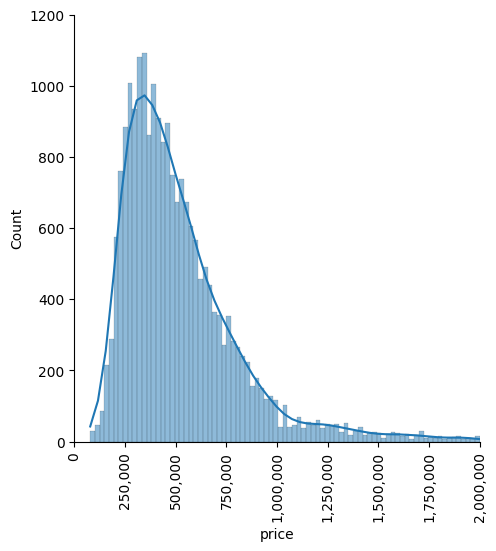

In [360]:

plt.figure(figsize = (100,100))
sns.displot(df['price'], kde = True)
plt.xlim(0, 2000000) 
plt.ylim(0,1200) 
plt.xticks(rotation='vertical')
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))


<Axes: xlabel='bedrooms', ylabel='count'>

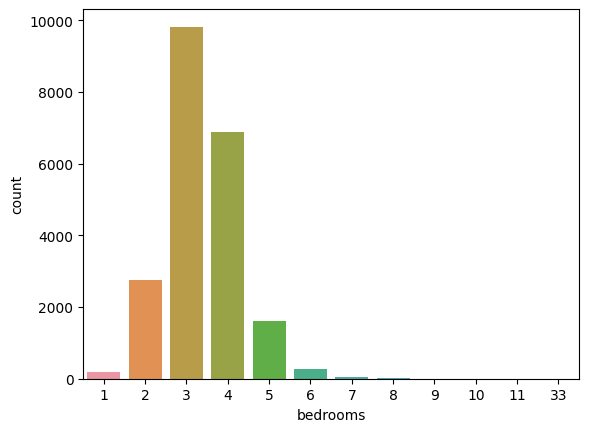

In [361]:
sns.countplot(x='bedrooms', data=df)

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.,
        14000., 16000.]),
 [Text(-2000.0, 0, '−2000'),
  Text(0.0, 0, '0'),
  Text(2000.0, 0, '2000'),
  Text(4000.0, 0, '4000'),
  Text(6000.0, 0, '6000'),
  Text(8000.0, 0, '8000'),
  Text(10000.0, 0, '10000'),
  Text(12000.0, 0, '12000'),
  Text(14000.0, 0, '14000'),
  Text(16000.0, 0, '16000')])

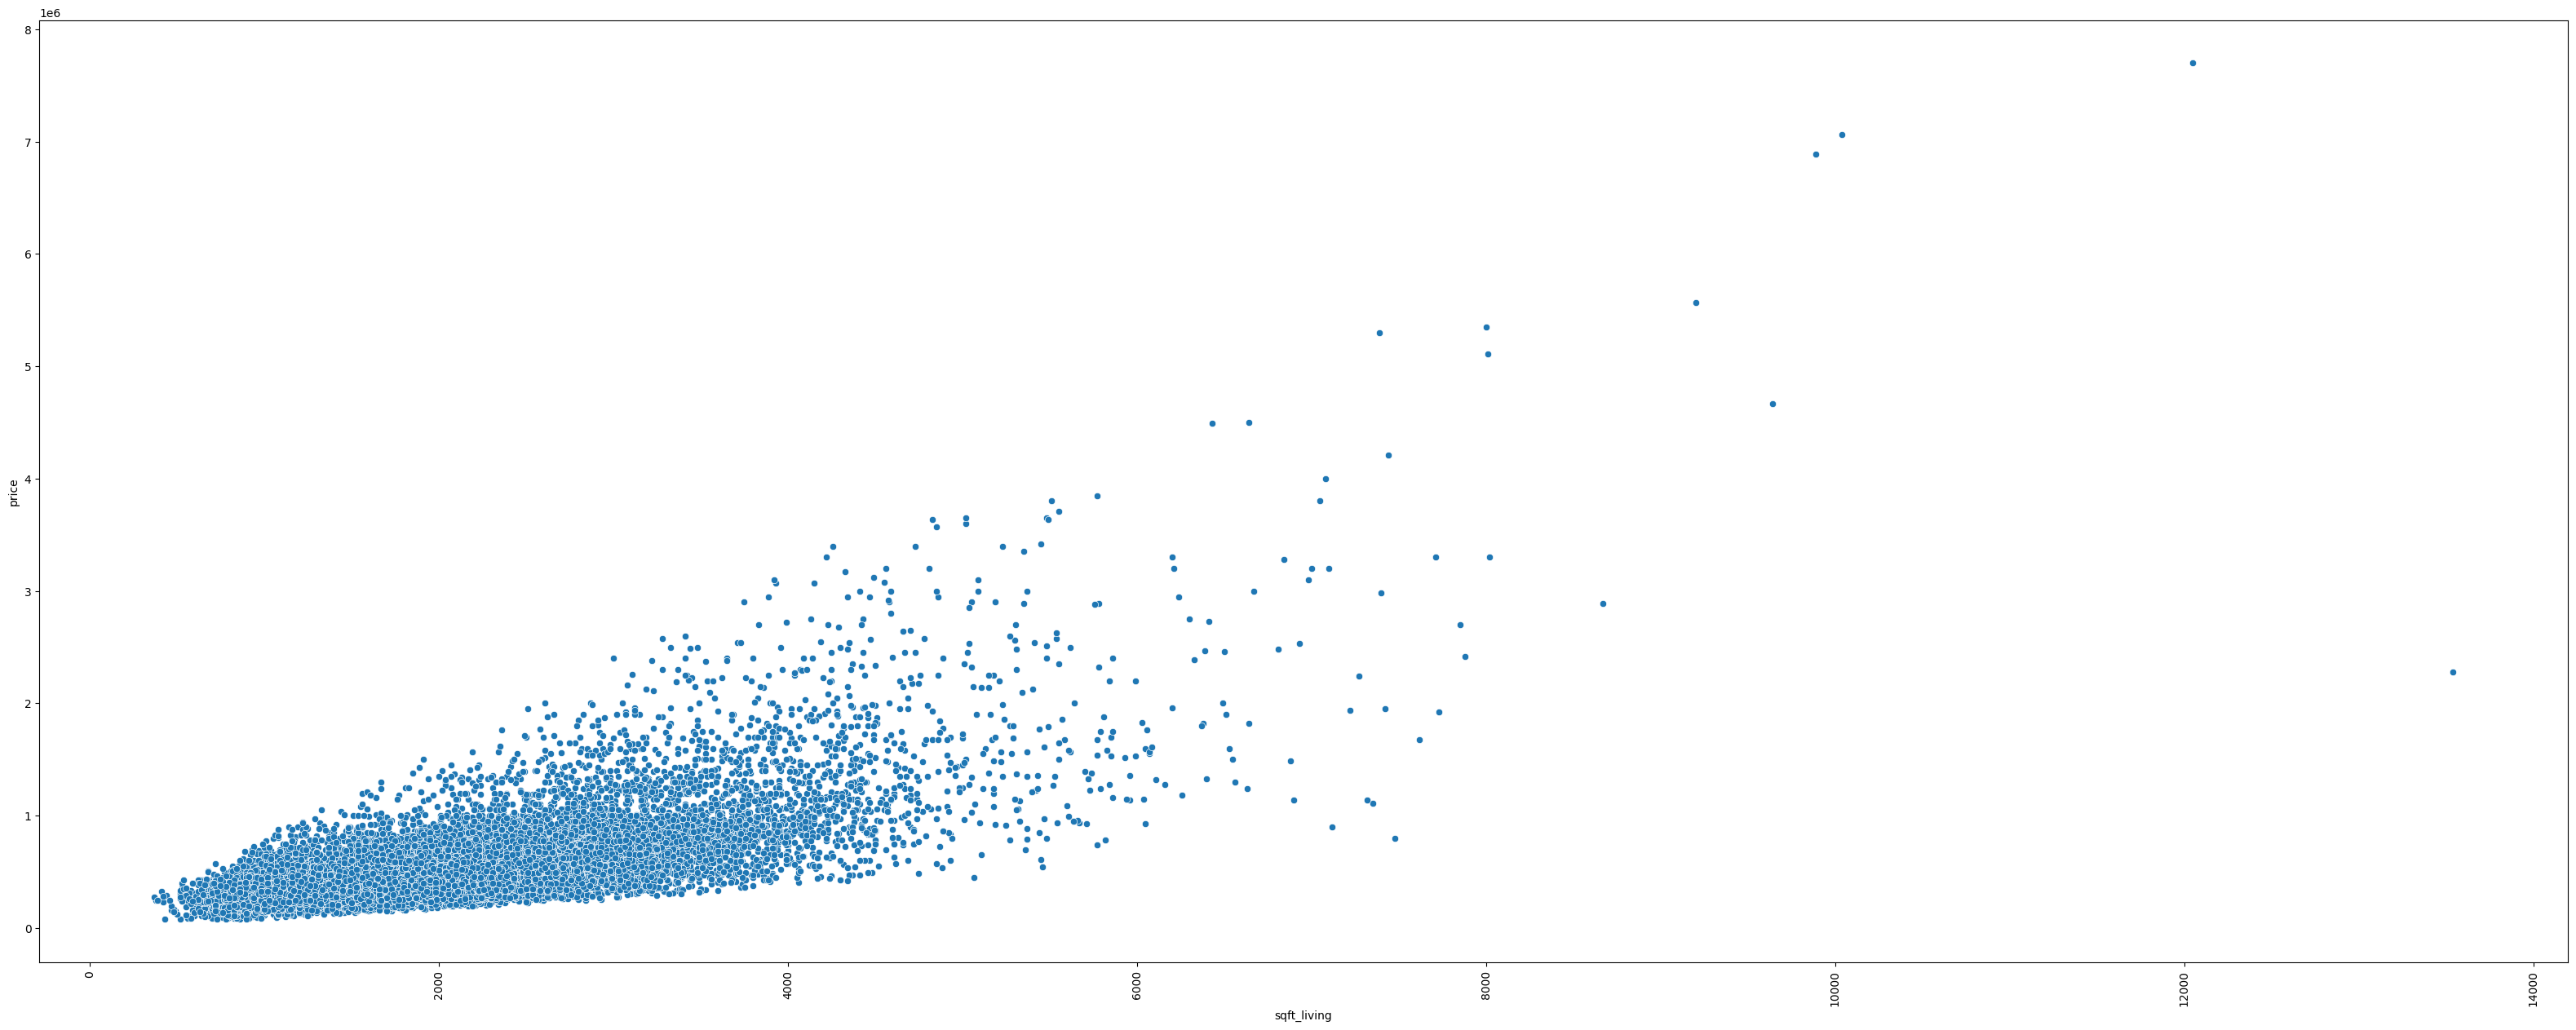

In [362]:
df_filtered = df[df['bedrooms'] == 3]


plt.figure(figsize=(40,15))
sns.scatterplot(x='sqft_living',y='price',data=df)
plt.xticks(rotation='vertical')

# show sthat the sqft_living has strong corr wtih the price


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 [Text(0, 0, '1900'),
  Text(1, 0, '1901'),
  Text(2, 0, '1902'),
  Text(3, 0, '1903'),
  Text(4, 0, '1904'),
  Text(5, 0, '1905'),
  Text(6, 0, '1906'),
  Text(7, 0, '1907'),
  Text(8, 0, '1908'),
  Text(9, 0, '1909'),
  Text(10, 0, '1910'),
  Text(11, 0, '1911'),
  Text(12, 0, '1912'),
  Text(13, 0, '1913'),
  Text(14, 0, '1914'),
  Text(15, 

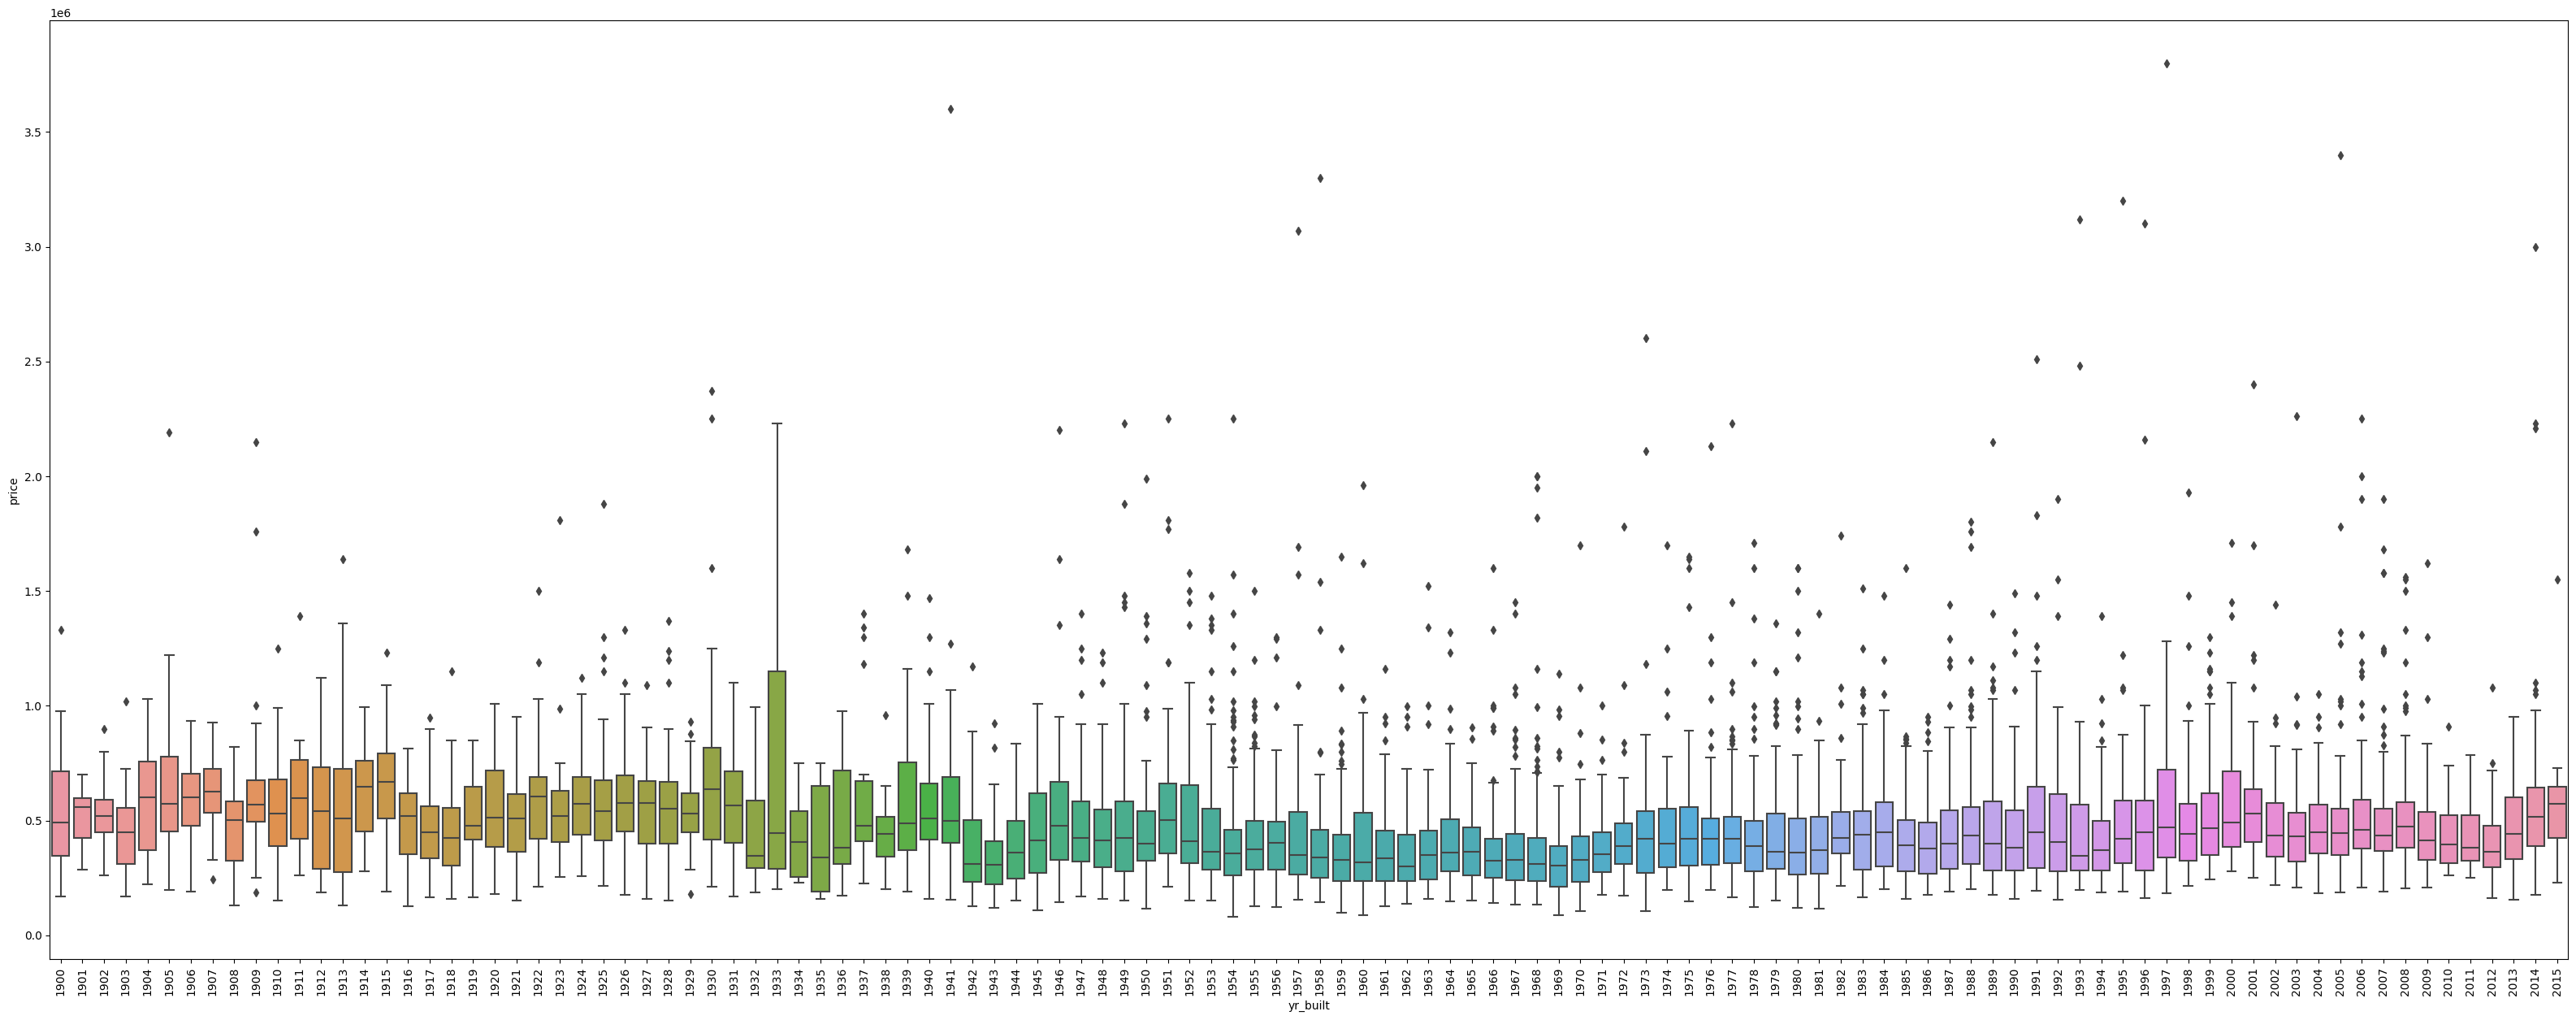

In [363]:
df_filtered = df[df['bedrooms'] == 3]

plt.figure(figsize=(40,15))
sns.boxplot(x='yr_built',y='price',data = df_filtered)
plt.xticks(rotation='vertical')

#shows that the yr_built feature does not show strong corr with the price. Median value of the house price for the given time frame does not significantly fluctuate. 

## Feature Engineering

In [364]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [365]:
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [366]:
df = df.drop(['date', 'id','zipcode'], axis = 1)

<Axes: xlabel='month', ylabel='count'>

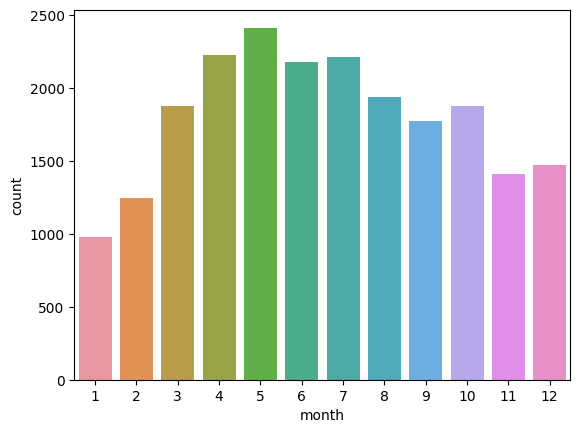

In [367]:
#shows the volumn of sales per each month. It appears that month 5 ~ 7 is the peak season. 
sns.countplot(x = 'month', data = df)

## Prediction 1 - Neural Network

In [375]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [374]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [368]:
X = df.drop('price', axis = 1).values
y = df['price'].values

In [369]:
from sklearn.model_selection import train_test_split

In [370]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [371]:
X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test) 
# normalize the features

In [372]:
X_train.shape

(15117, 19)

In [376]:
X_test.shape

(6480, 19)

In [378]:
model = Sequential()

model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1)) 

model.compile(optimizer = 'Adam', loss = 'mse')

In [380]:
model.fit(x = X_train,y = y_train,
          validation_data=(X_test,y_test),
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 429748125696.0000 - val_loss: 420101455872.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 428864602112.0000 - val_loss: 416818036736.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 412441804800.0000 - val_loss: 377958400000.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 323812491264.0000 - val_loss: 238809317376.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 164067262464.0000 - val_loss: 108648226816.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 101630533632.0000 - val_loss: 95320178688.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 98058485760.0000 - val_loss: 93467549696.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 96245088256.0000 - val_loss: 91644878848.0000
Epoch 9/400
119/119 [

## Evaluation

In [385]:
losses = pd.DataFrame(model.history.history)

<Axes: >

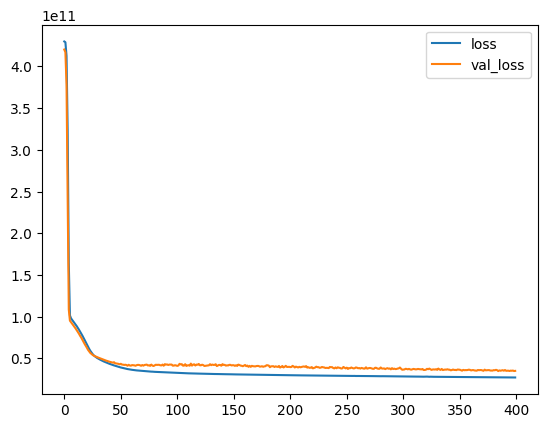

In [387]:
losses.plot() # shows that both loss and val loss are decreasing. 

In [388]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [389]:
prediction = model.predict(X_test)

203/203 [==============================] - 0s 504us/step


In [414]:
np.sqrt(mean_squared_error(y_test, prediction))

187451.2637202645

In [418]:
mean_absolute_error(y_test, prediction)

111706.68756389854

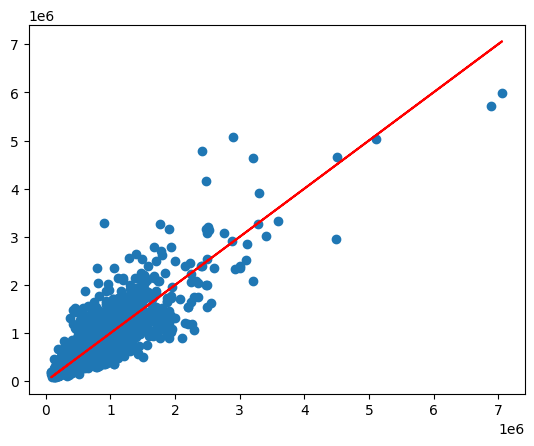

In [422]:
plt.scatter(y_test, prediction)
plt.plot(y_test, y_test, 'r')

## Predict a single house price 

In [462]:
single_house = df.drop('price', axis = 1).iloc[0] #extracting first row

In [460]:
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [461]:
single_house.shape 

(19,)

In [457]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [451]:
single_house.shape

(1, 19)

In [452]:
model.predict(single_house)

1/1 [==============================] - 0s 22ms/step


array([[246483.89]], dtype=float32)

In [453]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10


Reference : https://www.pieriandata.com